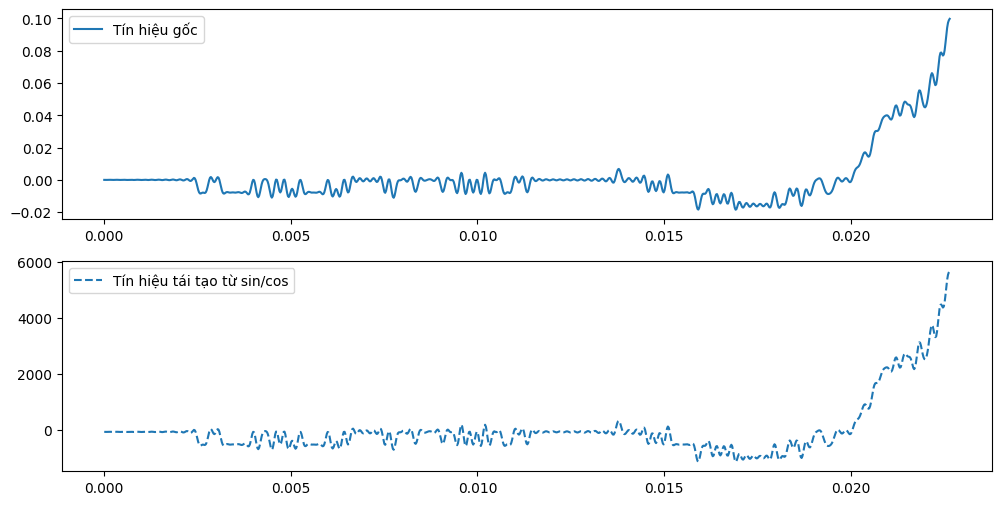

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Load file âm thanh
audio_path = librosa.example('trumpet')  # File mẫu của librosa
y, sr = librosa.load("male_voice.wav", sr=44100)  # Load với sample rate 44100 Hz

# Bước 2: Áp dụng Fourier Transform
N = len(y)  # Số mẫu
frequencies = np.fft.rfftfreq(N, d=1/sr)  # Tính các tần số tương ứng
fft_result = np.fft.rfft(y)  # Biến đổi Fourier nhanh

# Bước 3: Trích xuất biên độ và pha
amplitudes = np.abs(fft_result)  # Biên độ
phases = np.angle(fft_result)  # Pha

# Bước 4: Dùng tổng các sin và cos để tái tạo lại tín hiệu
t = np.linspace(0, len(y) / sr, num=len(y), endpoint=False)
reconstructed_signal = np.zeros_like(y)

for i in range(len(frequencies)):
    reconstructed_signal += amplitudes[i] * np.cos(2 * np.pi * frequencies[i] * t + phases[i])

# Bước 5: Vẽ tín hiệu gốc và tín hiệu tái tạo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t[:1000], y[:1000], label="Tín hiệu gốc")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:1000], reconstructed_signal[:1000], label="Tín hiệu tái tạo từ sin/cos", linestyle='dashed')
plt.legend()

plt.show()
